# RISK!

Simulate a game inspired to the pupular Risk! using data of real countries.

### Setup
<code>pip install pycountry</code>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Data

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name!="Antarctica"]

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


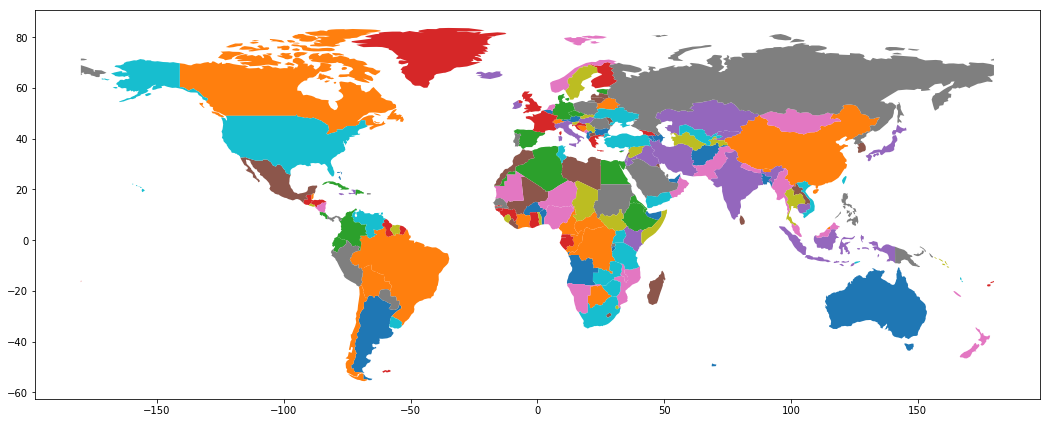

In [4]:
world.plot(figsize=(18,9), column='iso_a3')
plt.show()

# TASK 1: init countries
Create a class for representing countries as objects. Each country must have a *name*, *population*, *gdp*, and *poligon* coordinates.
Countries must expose the following methods:
- <code>country.neighbours()</code>: returns countries objects that are neighbours of the country at hand
- <code>country.power()</code>: returns a power score based on pupulation and gdp

### Hint for calculating neighbours

In [5]:
def neighbour(df, country_id):
    c = df.iloc[country_id]
    neighbours = df[~df.geometry.disjoint(c.geometry)]
    return neighbours

In [6]:
neighbour(world, 78)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."
28,7604467.0,Europe,Switzerland,CHE,316700.0,"POLYGON ((9.59422610844635 47.52505809182027, ..."
55,64057792.0,Europe,France,FRA,2128000.0,(POLYGON ((-52.55642473001839 2.50470530843705...
79,58126212.0,Europe,Italy,ITA,1823000.0,(POLYGON ((15.52037601081383 38.23115509699147...
150,2005692.0,Europe,Slovenia,SVN,59340.0,"POLYGON ((13.80647545742153 46.50930613869122,..."


# TASK 2: combat
Add to countries the following methods:
- <code>country.attack(opponent)</code>: return True if the attack is successfull. Implement a random choice based on the power of the two opponents
- <code>country.conquer(target)</code>: the country add the target gdp and population and merge borders

### Hint for merging borders

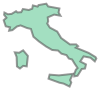

In [7]:
world.iloc[78].geometry

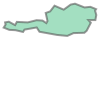

In [8]:
world.iloc[8].geometry

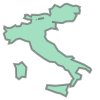

In [9]:
world.iloc[78].geometry.union(world.iloc[8].geometry)

# TASK 3: game
Create a game class for representing a RISK! simulation. For each turn, each country randomnly attacks its neighbours. If the attack is successfull, the target is conquered.
Implement the method:
- <code>game.to_df()</code>: returns the state of the world as a geopandas dataframe